Step 1: Setup Your Environment
 What You Need
Python installed (via Anaconda or pip)

google colab or Jupyter Notebook or VS Code

Libraries:

In [43]:
pip install pandas numpy matplotlib seaborn scikit-learn


Step 2: Load the Titanic Dataset
 Explanation:
here i am using Kaggle’s Titanic dataset which contains information like:

Name, Age, Sex, Ticket, Cabin

Whether the passenger survived or not (our target)

In [44]:
from google.colab import files
uploaded = files.upload()


Saving train.csv to train (3).csv


In [45]:
import pandas as pd

df = pd.read_csv("train.csv")
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Step 3: EDA (Exploratory Data Analysis)
This step helps us understand the data, identify patterns, and decide what cleaning or processing is needed.

Check the Dataset Info

In [46]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


 What this does:

Shows number of entries (rows)

Tells which columns have missing values

Shows data types (object, int, float, etc.)



 View Basic Statistics

In [47]:
df.describe()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


What this tells you:

Summary stats for numeric columns (mean, min, max, etc.)

Useful for spotting outliers and ranges



 Check for Missing Values

In [48]:
df.isnull().sum()


,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


Why this matters:

You'll see that "Age", "Cabin", and "Embarked" have missing values

We’ll handle these in the next step (data cleaning)



Visualize Survival Count

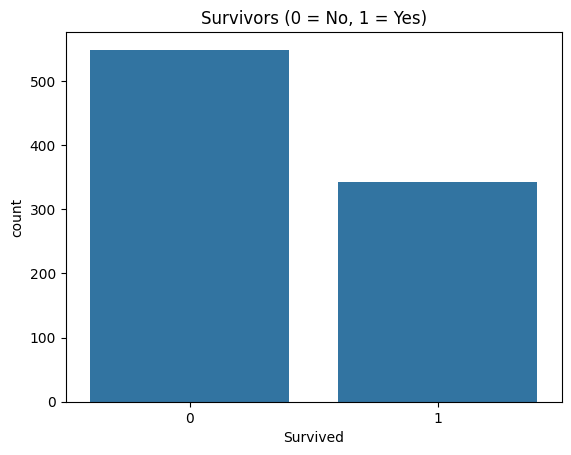

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df, x='Survived')
plt.title('Survivors (0 = No, 1 = Yes)')
plt.show()


Survival by Gender

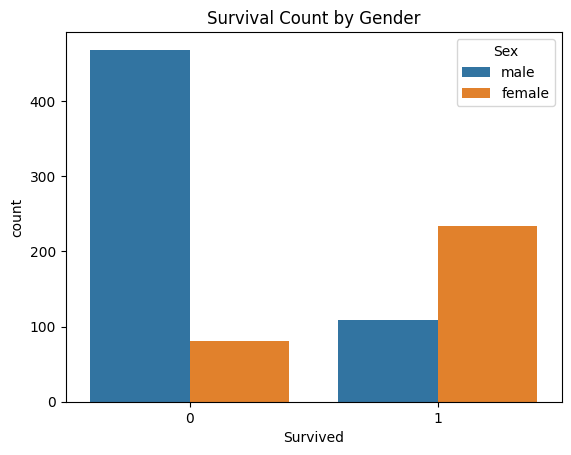

In [50]:
sns.countplot(data=df, x='Survived', hue='Sex')
plt.title('Survival Count by Gender')
plt.show()


 What this shows:

A clear pattern: females had a higher chance of survival than males

 Step 4: Data Cleaning

 Check Missing Values Again

In [51]:
df.isnull().sum()


,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


Drop Unnecessary Columns
We'll drop columns that don’t help the model or have too many missing values:

In [52]:
df = df.drop(columns=["PassengerId", "Name", "Ticket", "Cabin"])


Why:

"Cabin" has too many nulls

"Name" and "Ticket" aren’t useful (unless advanced feature engineering)

"PassengerId" is just a serial number

Fill Missing Values
 Fill "Age" with median:

In [53]:
df["Age"].fillna(df["Age"].median(), inplace=True)


/tmp/ipython-input-53-1567474574.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Age"].fillna(df["Age"].median(), inplace=True)


 Fill "Embarked" with the most common value:

In [54]:
df["Embarked"].fillna(df["Embarked"].mode()[0], inplace=True)


/tmp/ipython-input-54-585847971.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Embarked"].fillna(df["Embarked"].mode()[0], inplace=True)


Convert Categorical to Numeric
Machine learning models can't understand text — we’ll convert "Sex" and "Embarked" to numbers.

 Convert "Sex":

In [55]:
df["Sex"] = df["Sex"].map({"male": 0, "female": 1})


 One-Hot Encode "Embarked":

In [56]:
df = pd.get_dummies(df, columns=["Embarked"], drop_first=True)


 This will convert "Embarked" into binary columns like:

Embarked_Q

Embarked_S



In [57]:
df.head()
df.isnull().sum()


,0
Survived,0
Pclass,0
Sex,0
Age,0
SibSp,0
Parch,0
Fare,0
Embarked_Q,0
Embarked_S,0


Step 5: Split Data into Features and Target

Features (X) = All columns used to predict survival

Target (y) = The Survived column (what we’re trying to predict)

In [58]:
# Separate features (X) and target (y)
X = df.drop("Survived", axis=1)
y = df["Survived"]


 Split Into Training and Testing Sets
 Why?
We train the model on training data

We test how good it is on unseen test data

In [59]:
from sklearn.model_selection import train_test_split

# Split data: 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


 random_state=42 ensures reproducibility

 test_size=0.2 means 20% data used for testing

 Step 6: Train a Logistic Regression Model

import the model

In [60]:
from sklearn.linear_model import LogisticRegression


Train the model on training data:

In [61]:
model = LogisticRegression(max_iter=1000)  # in case it takes longer to converge
model.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

What’s happening here:
The model learns the relationship between features and survival.

max_iter=1000 increases the number of learning steps if needed.



Make Predictions on Test Data

In [62]:
y_pred = model.predict(X_test)


Now y_pred contains the survival predictions for the passengers in your test set.



 Step 7: Evaluate the Model

 check:

Accuracy → Overall performance

Confusion Matrix → True vs. false predictions

Classification Report → Precision, Recall, F1-Score



Import Evaluation Tools

In [63]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


 Accuracy Score


In [64]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.8100558659217877


Confusion Matrix

In [65]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)


Confusion Matrix:
 [[90 15]
 [19 55]]


 Classification Report

In [66]:
print("Classification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.86      0.84       105
           1       0.79      0.74      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



Shows:

Precision: How accurate are positive predictions?

Recall: How many actual positives did the model catch?

F1-score: Balance between precision & recall.

